# Image Processing Assignment 1
_by Flavio Caroli, Luca Colaci, Vittorio Rossi_

First, we selected the following image to be used as the ground truth. Subject (B)eatrice is 162 cm tall, while subject (F)lavio's height is to be estimated. 

Then, we denoted the two subjects and highlighted some parallel lines:

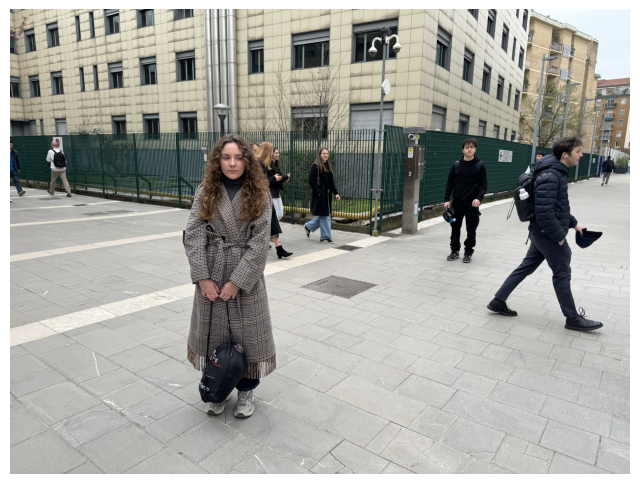

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("../data/IMG_0302.png")[:, :, ::-1]
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img)

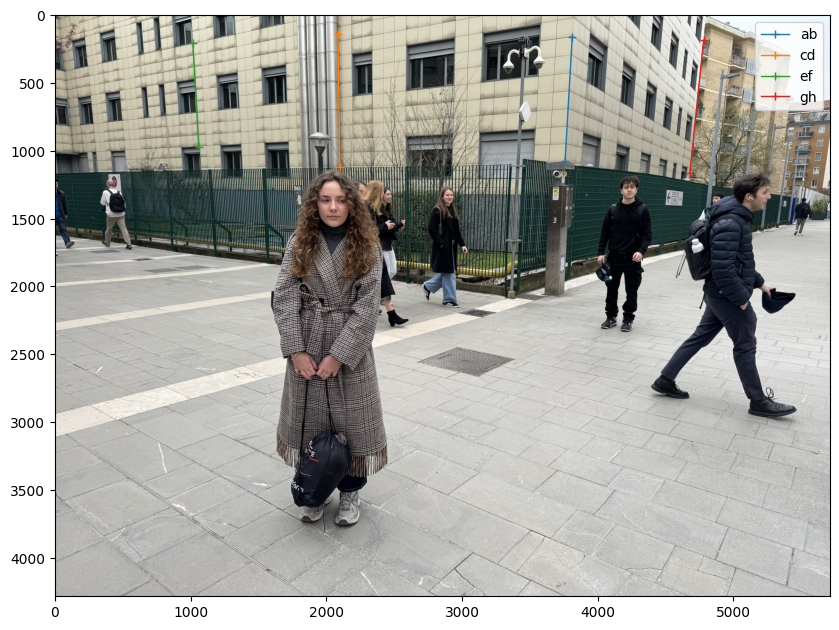

In [69]:
# Specifying vertical lines
a = np.array([3760, 1074, 1])
b = np.array([3813, 160, 1])
c = np.array([2100, 1118, 1])
d = np.array([2086, 140, 1])
e = np.array([1060, 970, 1])
f = np.array([1017, 207, 1])
g = np.array([4680, 1163, 1])
h = np.array([4781, 184, 1])
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.plot([a[0], b[0]], [a[1], b[1]], marker="+", label="ab", linewidth=1, color="orange")
plt.plot([c[0], d[0]], [c[1], d[1]], marker="+", label="cd", linewidth=1, color="orange")
plt.plot([e[0], f[0]], [e[1], f[1]], marker="+", label="ef", linewidth=1, color="orange")
plt.plot([g[0], h[0]], [g[1], h[1]], marker="+", label="gh", linewidth=1, color="orange")
plt.legend()

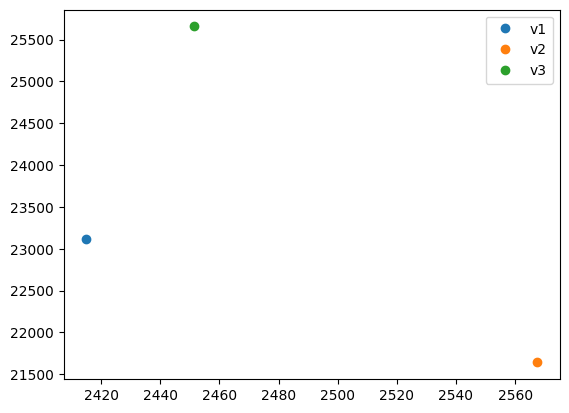

In [27]:
# Compute intersections between the lines to find the vanishing point
lab = np.cross(a, b)
lcd = np.cross(c, d)
lef = np.cross(e, f)
lgh = np.cross(g, h)

v1 = np.cross(lcd, lgh)
v2 = np.cross(lab, lgh)
v3 = np.cross(lcd, lef)

v1 = v1/v1[-1]
v2 = v2/v2[-1]
v3 = v3/v3[-1]

plt.plot(v1[0], v1[1], "o", label="v1")
plt.plot(v2[0], v2[1], "o", label="v2")
plt.plot(v3[0], v3[1], "o", label="v3")
plt.legend()

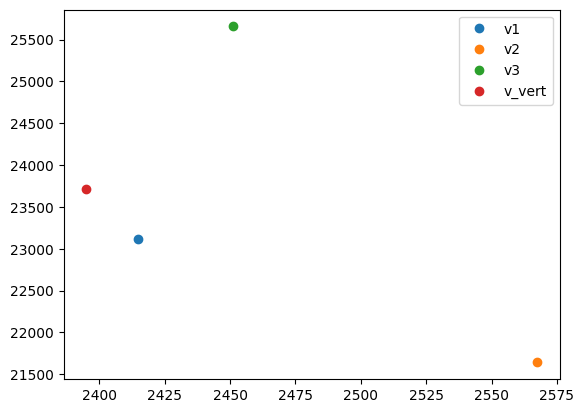

In [28]:
# Use SVD to estimate the error-minimising vanishing point
vertical_lines = np.vstack([lab,lcd,lef,lgh])
_,_,vt = np.linalg.svd(vertical_lines)
v_vert = vt[-1,:]
v_vert = v_vert/v_vert[-1]

plt.plot(v1[0], v1[1], "o", label="v1")
plt.plot(v2[0], v2[1], "o", label="v2")
plt.plot(v3[0], v3[1], "o", label="v3")
plt.plot(v_vert[0], v_vert[1], "o", label="v_vert")
plt.legend()

### Floor Rectification

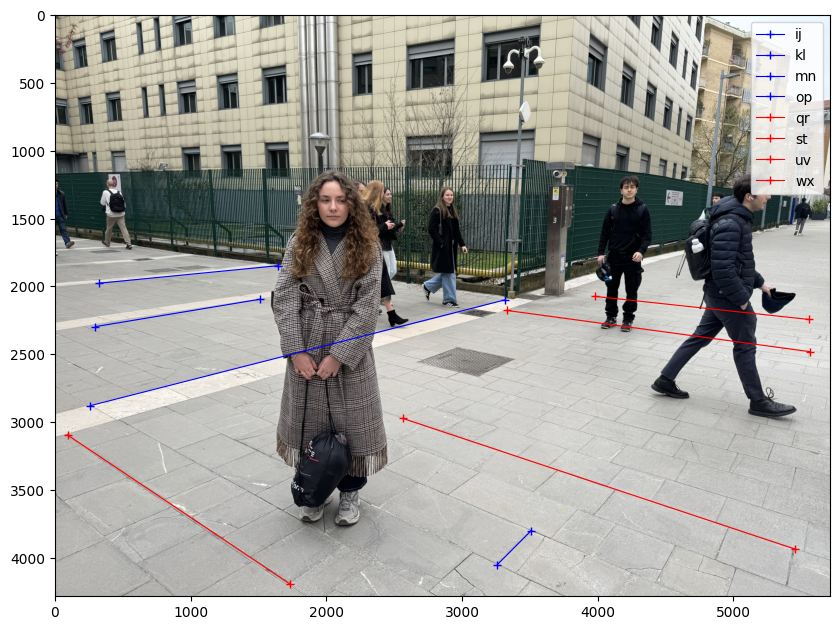

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(img)

# Specifying left-right lines
i = np.array([327, 1976, 1])
j = np.array([1645, 1847, 1])
k = np.array([299, 2296, 1])
l = np.array([1514, 2094, 1])
m = np.array([259, 2879, 1]) 
n = np.array([3317, 2099, 1])
o = np.array([3261, 4050, 1])
p = np.array([3508, 3802, 1])

plt.plot([i[0], j[0]], [i[1], j[1]], marker="+", label="ij", linewidth=0.8, color = "blue")
plt.plot([k[0], l[0]], [k[1], l[1]], marker="+", label="kl", linewidth=0.8, color = "blue")
plt.plot([m[0], n[0]], [m[1], n[1]], marker="+", label="mn", linewidth=0.8, color = "blue")
plt.plot([o[0], p[0]], [o[1], p[1]], marker="+", label="op", linewidth=0.8, color = "blue")


# Specifying right-left lines 
q = np.array([3978, 2073, 1])
r = np.array([5555, 2243, 1])
s = np.array([3332, 2177, 1])
t = np.array([5565, 2481, 1])
u = np.array([2565, 2973, 1])
v = np.array([5452, 3935, 1])
w = np.array([95, 3096, 1])
x = np.array([1730, 4191, 1])

plt.plot([q[0], r[0]], [q[1], r[1]], marker="+", label="qr", linewidth=0.8, color = "red")
plt.plot([s[0], t[0]], [s[1], t[1]], marker="+", label="st", linewidth=0.8, color = "red")
plt.plot([u[0], v[0]], [u[1], v[1]], marker="+", label="uv", linewidth=0.8, color = "red")
plt.plot([w[0], x[0]], [w[1], x[1]], marker="+", label="wx", linewidth=0.8, color = "red")

plt.legend()

In [30]:
# Vanishing point and vanishing line for left-right lines using SVD to estimate the error-minimising vanishing point
lqr = np.cross(q, r)
lst = np.cross(s, t)
luv = np.cross(u, v)
lwx = np.cross(w, x)
 
lqr = lqr / lqr[-1]
lst = lst / lst[-1]
luv = luv / luv[-1]
lwx = lwx / lwx[-1]

floor_lines2 = np.vstack([lqr, lst, luv, lwx])
_, _, vt = np.linalg.svd(floor_lines2)
v_floor2 = vt[-1]
print(v_floor2)
v_floor2 = v_floor2/v_floor2[-1]

[-8.68140944e-01  4.96317612e-01  3.60406370e-04]


In [31]:
# Vanishing point and vanishing line for right-left lines
lij = np.cross(i, j)
lkl = np.cross(k, l)
lmn = np.cross(m, n)
lop = np.cross(o, p)

lij = lij / lij[-1]
lkl = lkl / lkl[-1]
lmn = lmn / lmn[-1]
lop = lop / lop[-1]

floor_lines1 = np.vstack([lij, lkl, lmn, lop])
_, _, vt = np.linalg.svd(floor_lines1)
v_floor1 = vt[-1]
print(v_floor1)
v_floor1 = v_floor1/v_floor1[-1]

[-9.72488689e-01 -2.32950044e-01 -1.65023216e-04]


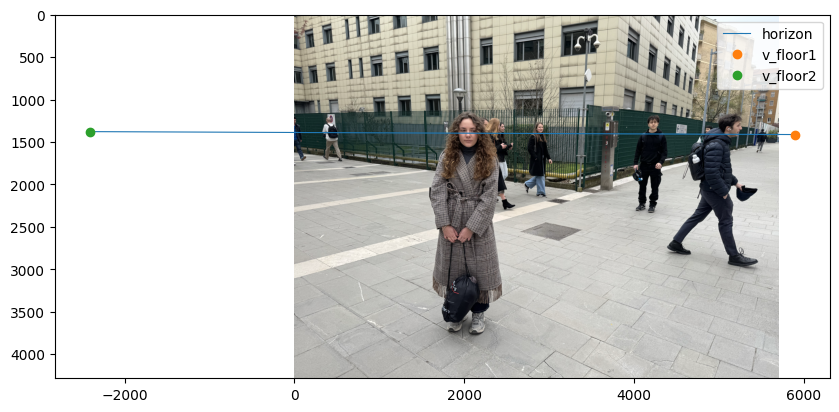

In [32]:
# Computing the horizon line
horizon = np.cross(v_floor1, v_floor2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.plot([v_floor1[0], v_floor2[0]], [v_floor1[1], v_floor2[1]],
         label="horizon", linewidth=0.8)

plt.plot(v_floor1[0], v_floor1[1], "o", label="v_floor1")
plt.plot(v_floor2[0], v_floor2[1], "o", label="v_floor2")
plt.legend()

In [57]:
# Building the (normalized) rectified homography
horizon = horizon/np.linalg.norm(horizon)

H = np.hstack([np.eye(2), np.zeros((2, 1))])
H = np.vstack([H, horizon])

H = H/H[-1, -1]

# Check that the horizon is mapped correctly
print(f"{np.linalg.inv(H).T@horizon.reshape((-1,1))}")

[[4.6707665e-24]
 [0.0000000e+00]
 [9.9999974e-01]]


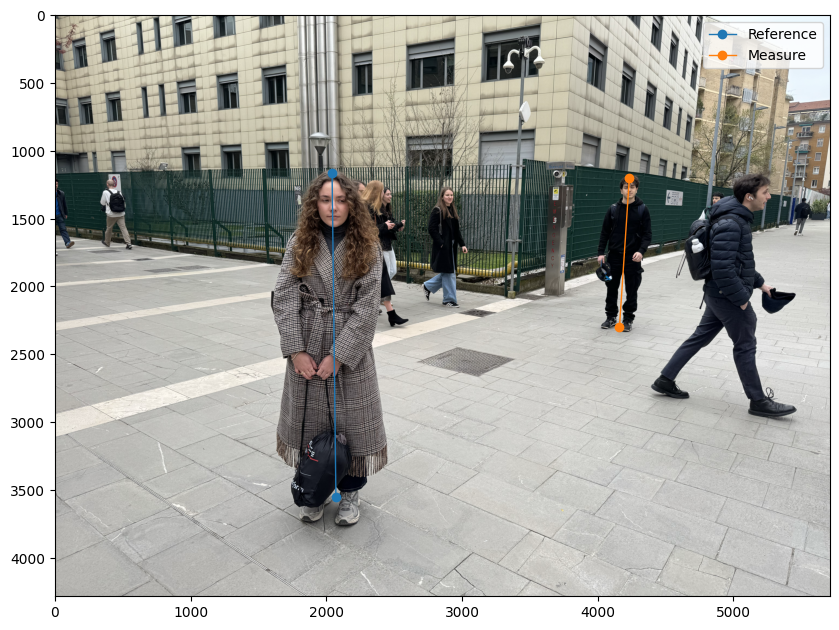

In [51]:
# Creating the reference points

B_bottom =  np.array([2071, 3553, 1])
B_top =  np.array([2043, 1165, 1])

F_top =np.array([4234, 1200, 1])
F_bottom =np.array([4161, 2296, 1])


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.plot([B_top[0], B_bottom[0]], [B_top[1], B_bottom[1]],
         marker="o", label="Reference", linewidth=1)
plt.plot([F_top[0], F_bottom[0]], [F_top[1], F_bottom[1]],
         marker="o", label="Measure", linewidth=1)
plt.legend()

In [58]:
u = np.cross(np.cross(B_bottom, F_bottom), horizon)
u = u/u[-1]

l_measure = np.cross(B_bottom, v_vert)
ref_top_tilde = np.cross(np.cross(B_top, u),l_measure)
ref_top_tilde = ref_top_tilde/ref_top_tilde[-1]

dist_ref_top_tilde = np.linalg.norm(ref_top_tilde - B_bottom)
dist_measure_top = np.linalg.norm(F_bottom - B_bottom)
dist_vert = np.linalg.norm(v_vert - F_bottom)

# Compute 1d projective transformation mapping the vanishing point to infinity
# (0,1) -> (0,1)
# (v_vert,0) -> (1,0)

H = np.eye(2)
H[-1] = [1,dist_vert]

# Compute the distance ratio

dist_ref_measure_ratio = dist_ref_top_tilde * (dist_vert - dist_measure_top)/(dist_measure_top*(dist_vert-dist_ref_top_tilde))

# Measured dist = ref_dist / dist_ref_measure_ratio
ref_dist = 163
measured_dist = ref_dist / dist_ref_measure_ratio
print(measured_dist)

166.83770636582582


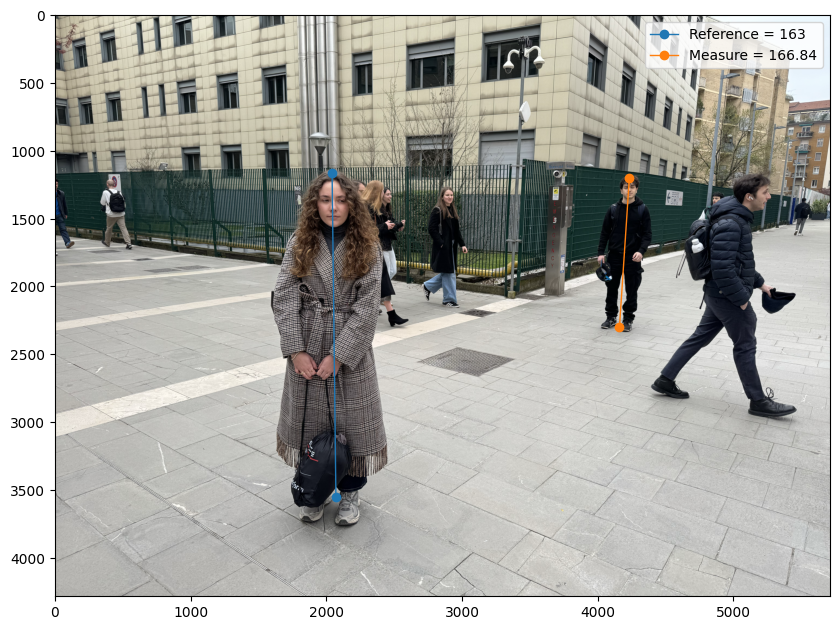

In [61]:
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.plot([B_top[0], B_bottom[0]], [B_top[1], B_bottom[1]],
         marker="o", label=f"Reference = {ref_dist}", linewidth=1)
plt.plot([F_top[0], F_bottom[0]], [F_top[1], F_bottom[1]],
         marker="o", label=f"Measure = {measured_dist:.2f}", linewidth=1)
plt.legend()

In [66]:
def cross_ratio(a, b, c, d):
    """
    Compute the cross-ratio of four collinear points.
    CR(a,b,c,d) = ((a-c)*(b-d))/((a-d)*(b-c))
    """
    # Convert to 1D if they're homogeneous coordinates
    if len(a) > 1:
        # Project points onto the line connecting them
        line = np.cross(a, d)  # Line through points
        # Get a direction vector along the line
        direction = np.array([line[1], -line[0]])
        direction = direction / np.linalg.norm(direction)
        
        # Project points onto this direction
        a_proj = np.dot(a[:2], direction)
        b_proj = np.dot(b[:2], direction)
        c_proj = np.dot(c[:2], direction)
        d_proj = np.dot(d[:2], direction)
        
        # Compute cross-ratio in 1D
        return ((a_proj-c_proj)*(b_proj-d_proj))/((a_proj-d_proj)*(b_proj-c_proj))
    else:
        # Already 1D
        return ((a-c)*(b-d))/((a-d)*(b-c))

# Get the reference line (projection onto vertical vanishing line)
ref_line = np.cross(B_bottom, v_vert)
ref_line = ref_line / np.linalg.norm(ref_line[:2])

# Get the measure line (projection onto vertical vanishing line)
measure_line = np.cross(F_bottom, v_vert)
measure_line = measure_line / np.linalg.norm(measure_line[:2])

# Get the horizon intersection points
ref_horizon = np.cross(ref_line, horizon)
ref_horizon = ref_horizon / ref_horizon[2]  # Normalize

measure_horizon = np.cross(measure_line, horizon)
measure_horizon = measure_horizon / measure_horizon[2]  # Normalize

# Compute the cross-ratios
cr_reference = cross_ratio(v_vert, B_bottom, B_top, ref_horizon)
cr_measure = cross_ratio(v_vert, F_bottom, F_top, measure_horizon)

print(f"Cross-ratio (reference): {cr_reference}")
print(f"Cross-ratio (measure): {cr_measure}")

# The ratio of heights is directly related to the ratio of cross-ratios
# H_measure/H_reference = CR_reference/CR_measure
height_ratio = cr_reference / cr_measure

# Known reference height in cm
ref_height = 161  # Height in cm

# Calculate the measured height using cross-ratio
measured_height = ref_height * height_ratio

Cross-ratio (reference): 0.9128291283351817
Cross-ratio (measure): 0.8216828186012607


In [67]:
def cross_ratio(a, b, c, d):
    """
    Compute the cross-ratio of four collinear points.
    CR(a,b,c,d) = ((a-c)*(b-d))/((a-d)*(b-c))
    """
    # Convert to 1D if they're homogeneous coordinates
    if len(a) > 1:
        # Project points onto the line connecting them
        line = np.cross(a, d)  # Line through points
        # Get a direction vector along the line
        direction = np.array([line[1], -line[0]])
        direction = direction / np.linalg.norm(direction)
        
        # Project points onto this direction
        a_proj = np.dot(a[:2], direction)
        b_proj = np.dot(b[:2], direction)
        c_proj = np.dot(c[:2], direction)
        d_proj = np.dot(d[:2], direction)
        
        # Compute cross-ratio in 1D
        return ((a_proj-c_proj)*(b_proj-d_proj))/((a_proj-d_proj)*(b_proj-c_proj))
    else:
        # Already 1D
        return ((a-c)*(b-d))/((a-d)*(b-c))

# Get the reference line (projection onto vertical vanishing line)
ref_line = np.cross(B_bottom, v_vert)
ref_line = ref_line / np.linalg.norm(ref_line[:2])

# Get the measure line (projection onto vertical vanishing line)
measure_line = np.cross(F_bottom, v_vert)
measure_line = measure_line / np.linalg.norm(measure_line[:2])

# Get the horizon intersection points
ref_horizon = np.cross(ref_line, horizon)
ref_horizon = ref_horizon / ref_horizon[2]  # Normalize

measure_horizon = np.cross(measure_line, horizon)
measure_horizon = measure_horizon / measure_horizon[2]  # Normalize

# Compute the cross-ratios
cr_reference = cross_ratio(v_vert, B_bottom, B_top, ref_horizon)
cr_measure = cross_ratio(v_vert, F_bottom, F_top, measure_horizon)

print(f"Cross-ratio (reference): {cr_reference}")
print(f"Cross-ratio (measure): {cr_measure}")

# The ratio of heights is directly related to the ratio of cross-ratios
# H_measure/H_reference = CR_reference/CR_measure
height_ratio = cr_reference / cr_measure

# Known reference height in cm
ref_height = 163  # Height in cm

# Calculate the measured height using cross-ratio
measured_height = ref_height * height_ratio

Cross-ratio (reference): 0.9128291283351817
Cross-ratio (measure): 0.8216828186012607
